# Tutorial 6: Probabilistic Modeling with Gaussian Measures

In this tutorial, we explore the `GaussianMeasure` class, a powerful tool for defining probability distributions on `HilbertSpace`s.

### The Theory in Outline

A Gaussian measure on a `HilbertSpace`, $X$, is a probability measure that is completely defined by two quantities:
1.  **The Expectation ($\mu$)**: A vector $\mu \in X$ that represents the mean of the distribution.
2.  **The Covariance ($C$)**: A self-adjoint, positive semi-definite `LinearOperator`, $C: X \to X$, that describes the variance and correlation structure of the distribution.

We denote this as $u \sim \mathcal{N}(\mu, C)$. A key property of Gaussian measures is that they remain Gaussian under affine transformations. If $u \sim \mathcal{N}(\mu_u, C_u)$ and we have a map $v = A(u) + b$, then the distribution for $v$ is also Gaussian:
$$
v \sim \mathcal{N}(A(\mu_u) + b, A C_u A^*)
$$
This property is implemented in the `.affine_mapping()` method and is the foundation of Bayesian inversion.

In this tutorial, we will:
1.  Create and sample from a `GaussianMeasure` on `EuclideanSpace`.
2.  Create an **invariant Gaussian measure** on a `Sobolev` space on the circle, whose samples are smooth random functions.
3.  Do the same for a `Sobolev` space on the sphere.
4.  Demonstrate the effect of an **affine transformation** on a measure of random functions.
5.  Introduce **low-rank approximations** for computational efficiency.

In [1]:
# To run in colab, uncomment the line below to install pygeoinf. 
#%pip install pygeoinf

import numpy as np
import matplotlib.pyplot as plt
import pygeoinf as inf
from pygeoinf.symmetric_space.circle import Sobolev as CircleSobolev
from pygeoinf.symmetric_space.sphere import Sobolev as SphereSobolev
import cartopy.crs as ccrs

# For reproducibility
np.random.seed(2)

## 1. Gaussian Measures on Euclidean Space

Let's start with a simple 2D example. We can create a `GaussianMeasure` from a mean vector and a covariance matrix. We can then draw samples and visualize the distribution.

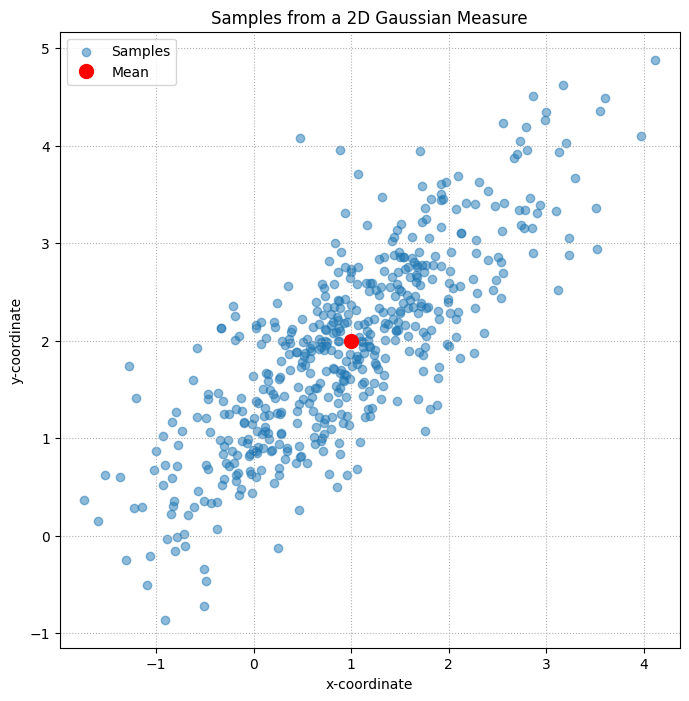

In [2]:
space = inf.EuclideanSpace(2)
mean = np.array([1.0, 2.0])
cov_matrix = np.array([[1.0, 0.8], [0.8, 1.0]])

# Create the measure from the covariance matrix
measure = inf.GaussianMeasure.from_covariance_matrix(space, cov_matrix, expectation=mean)

# Draw samples
samples = np.stack(measure.samples(500), axis=0)

# Plot the results
plt.figure(figsize=(8, 8))
plt.scatter(samples[:, 0], samples[:, 1], alpha=0.5, label='Samples')
plt.plot(mean[0], mean[1], 'ro', markersize=10, label='Mean')
plt.title('Samples from a 2D Gaussian Measure')
plt.xlabel('x-coordinate')
plt.ylabel('y-coordinate')
plt.grid(True, linestyle=':')
plt.legend()
plt.axis('equal')
plt.show()

## 2. Random Functions on the Circle

Now for the exciting part: creating a distribution over *functions*. We'll use our `CircleSobolev` space and one of its powerful helper methods to create a `GaussianMeasure` whose samples are smooth, random functions.

The `point_value_scaled_sobolev_kernel_gaussian_measure` method creates a measure with a special covariance operator that enforces smoothness. We can control the typical "amplitude" of the random functions directly.

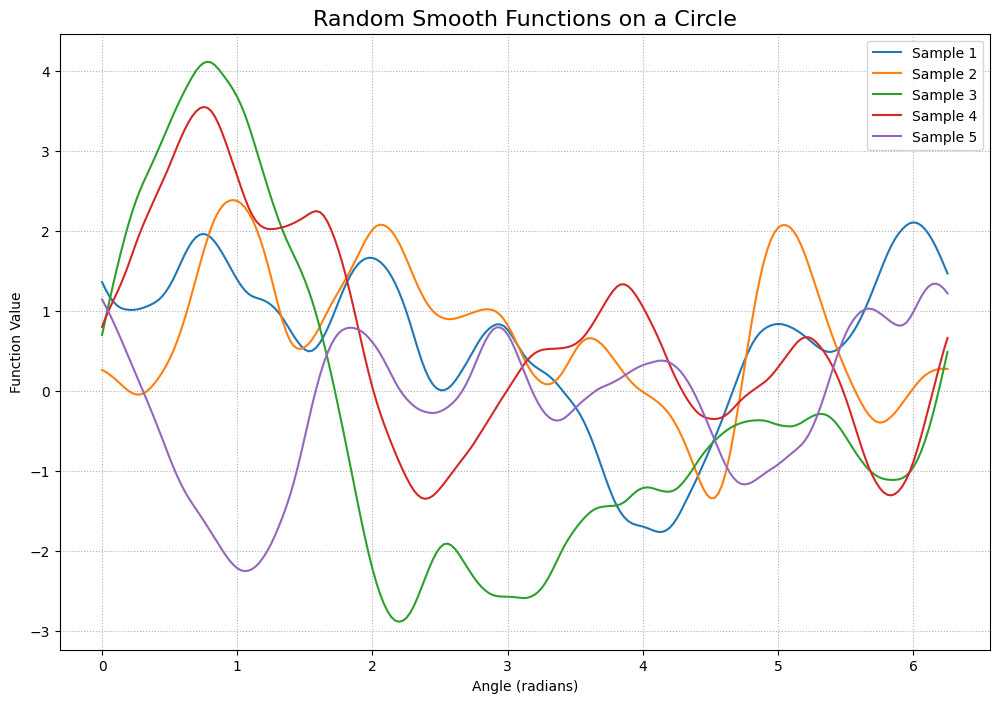

<Figure size 1000x800 with 0 Axes>

<Figure size 1000x800 with 0 Axes>

<Figure size 1000x800 with 0 Axes>

<Figure size 1000x800 with 0 Axes>

<Figure size 1000x800 with 0 Axes>

In [3]:
# Create a Sobolev space on the circle
circle_space = CircleSobolev.from_sobolev_parameters(2.0, 0.2, radius=1.0)

# Create an invariant Gaussian measure on this space
# The samples will be smooth functions with a typical standard deviation of 1.5
circle_measure = circle_space.point_value_scaled_sobolev_kernel_gaussian_measure(
    order=2.0, scale=0.2, amplitude=1.5
)

# --- Draw and plot some random functions ---
fig, ax = plt.subplots(figsize=(12, 8))
ax.set_title("Random Smooth Functions on a Circle", fontsize=16)

for i in range(5):
    # Each sample is a complete function
    random_function = circle_measure.sample()
    circle_space.plot(random_function, ax=ax, label=f'Sample {i+1}')

ax.legend()
ax.grid(True, linestyle=':')
ax.set_xlabel('Angle (radians)')
ax.set_ylabel('Function Value')
plt.show()

## 3. Random Fields on the Sphere

We can do the exact same thing for the sphere. The syntax is identical, but now each "sample" is a 2D random field on the surface of the sphere. We will use the built-in `cartopy` plotting to visualize one of these random fields.

Drawing one sample from the measure on the sphere...
The sample is a <class 'pyshtools.shclasses.shgrid.DHRealGrid'> object.


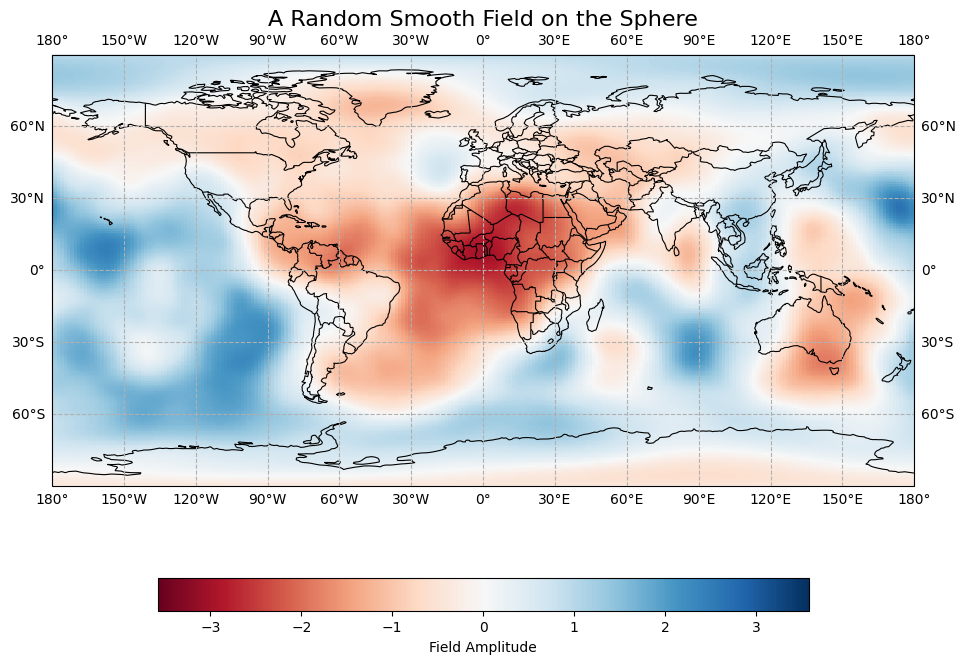

In [4]:
# Create a Sobolev space on the sphere
sphere_space = SphereSobolev(128, 2, 0.1)

# Create an invariant Gaussian measure
# The samples will be smooth 2D fields with a typical amplitude of 1.0
sphere_measure = sphere_space.point_value_scaled_sobolev_kernel_gaussian_measure(
    order=2.0, scale=0.2, amplitude=1.0
)

# --- Draw and plot one random field ---
# A single sample from the measure
random_field = sphere_measure.sample()

print("Drawing one sample from the measure on the sphere...")
print(f"The sample is a {type(random_field)} object.")

# Use the space's built-in plotting method
fig, ax, im = sphere_space.plot(
    random_field,
    figsize=(12, 8),
    coasts=True,
    borders=True,
    symmetric=True # Center the colormap at zero
)

ax.set_title("A Random Smooth Field on the Sphere", fontsize=16)
fig.colorbar(im, ax=ax, orientation='horizontal', shrink=0.7, label='Field Amplitude')
plt.show()

## 4. Affine Transformations of Measures

Finally, we'll demonstrate the `affine_mapping` method on a measure of functions. We will define a "prior" distribution of functions, then apply a transformation $y = A(x) + b$ where $A$ is the differentiation operator and $b$ is a sine wave.

The result is a new "posterior" `GaussianMeasure` whose samples are the derivatives of the prior samples plus a sine wave.

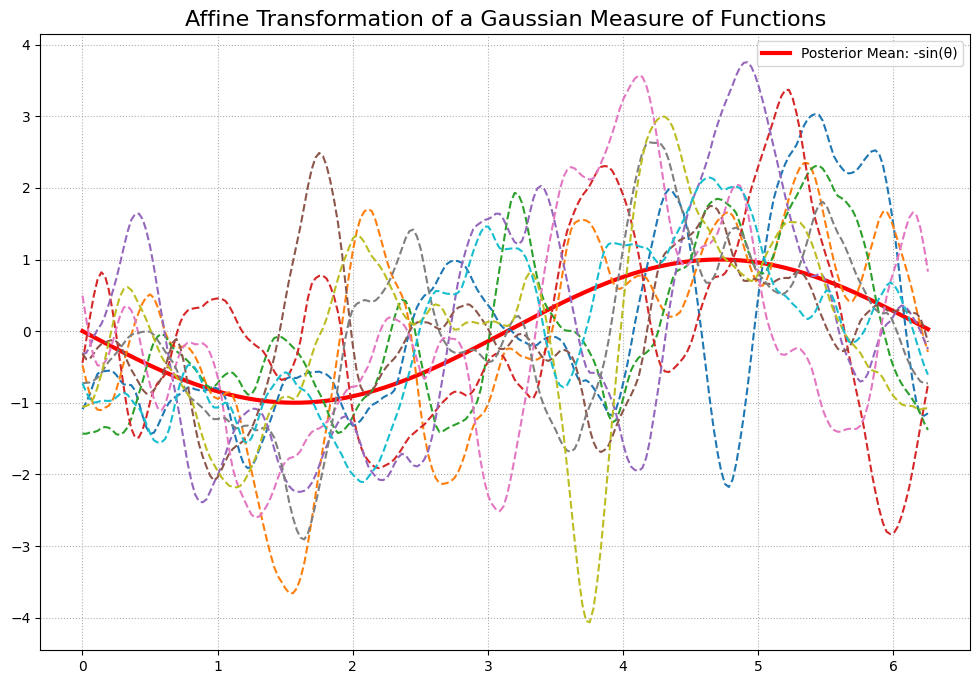

<Figure size 1000x800 with 0 Axes>

<Figure size 1000x800 with 0 Axes>

<Figure size 1000x800 with 0 Axes>

<Figure size 1000x800 with 0 Axes>

<Figure size 1000x800 with 0 Axes>

<Figure size 1000x800 with 0 Axes>

<Figure size 1000x800 with 0 Axes>

<Figure size 1000x800 with 0 Axes>

<Figure size 1000x800 with 0 Axes>

<Figure size 1000x800 with 0 Axes>

<Figure size 1000x800 with 0 Axes>

In [6]:
# --- Define the Prior Measure ---
# Use the circle_space from before
space = circle_space
# Define a mean function mu_x(theta) = 2*cos(theta)
prior_mean = space.project_function(lambda theta: 2 * np.cos(theta))

# Create a prior measure with this mean
prior_measure = space.point_value_scaled_sobolev_kernel_gaussian_measure(
    2.0, 0.2, amplitude=0.5
)
# Manually set the non-zero mean
prior_measure = inf.GaussianMeasure(
    covariance_factor=prior_measure.covariance_factor,
    expectation=prior_mean
)

# --- Define the Affine Transformation ---

# 1. Define the operator on the simple, underlying Lebesgue space first.
lebesgue_space = space.underlying_space

# Define the basic differentiation mapping
def diff_map(u):
    coeff = space.to_coefficient(u)
    k = np.arange(coeff.size)
    diff_coeff = 1j * k * coeff
    return space.from_coefficient(diff_coeff)

# On the L2 space, the adjoint of d/d(theta) is -d/d(theta). We can provide
# this known, simple adjoint for maximum efficiency.
diff_op_L2 = inf.LinearOperator(lebesgue_space, lebesgue_space, diff_map,
                                adjoint_mapping = lambda u: -1 * diff_map(u))

# 2. Now, "lift" the L2 operator to the Sobolev space using from_formal_adjoint.
# This will automatically construct the correct, more complex adjoint for the
# Sobolev inner product.
diff_operator = inf.LinearOperator.from_formal_adjoint(space, space, diff_op_L2)


# 3. The Translation Vector (b = sin(theta))
translation_func = space.project_function(lambda theta: np.sin(theta))


# --- Apply the Transformation ---
posterior_measure = prior_measure.affine_mapping(
    operator=diff_operator,
    translation=translation_func
)

# --- Visualize the Result ---
fig, ax = plt.subplots(figsize=(12, 8))
ax.set_title("Affine Transformation of a Gaussian Measure of Functions", fontsize=16)
# Plot the posterior mean: d/dtheta(2cos(theta)) + sin(theta) = -sin(theta)
space.plot(posterior_measure.expectation, ax=ax, color='r', linewidth=3, label='Posterior Mean: -sin(θ)')

# Draw and plot some samples from the new, transformed measure
for i in range(10):
    posterior_sample = posterior_measure.sample()
    space.plot(posterior_sample, ax=ax, linestyle='--')

ax.legend()
ax.grid(True, linestyle=':')
plt.show()